<h1>Data exploration

In [3]:
#useful imports
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import KernelPCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler


#font settings
class font:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    ITALIC = '\x1B[3m'
    
def printSpecial(message : str = " ") -> None:
    print(font.UNDERLINE + font.BOLD + "\n" + message + ":" + font.END)

def printBold(message : str = " ") -> None:
    print(font.BOLD + "\n" + message + font.END)

In [5]:
#preliminary data analysis
df = pd.read_csv('t-shirts.csv')

printSpecial("10 first objects from the table")
print(df.head(10))

printSpecial("Data description")
print(df.info())

printSpecial("Data analysis")
print(df.describe(include='all'))

printSpecial("Maximal number of combinations")
print(str(7*5*10*2*3))

printSpecial("Sizes")
print(df['size'].value_counts())
printSpecial("Materials")
print(df['material'].value_counts())
printSpecial("Colors")
print(df['color'].value_counts())
printSpecial("Sleeves length")
print(df['sleeves'].value_counts())
printSpecial("Demand")
print(df['demand'].value_counts())

printSpecial("Number of duplicated rows")
print(df.duplicated().sum())

df_cleaned = df.drop_duplicates()

printSpecial("Number of rows after removal")
print(df_cleaned.shape[0])


10 first objects from the table:
  size   material   color sleeves  demand
0    S      nylon   white    long  medium
1   XL  polyester   cream   short    high
2    S       silk    blue   short  medium
3    M     cotton   black   short  medium
4   XL  polyester  orange    long  medium
5   XS  polyester   black   short  medium
6  XXL  polyester   green   short  medium
7    L      linen  yellow   short    high
8   XL      linen   cream    long    high
9   XS      nylon     red   short    high

Data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   size      20000 non-null  object
 1   material  20000 non-null  object
 2   color     20000 non-null  object
 3   sleeves   20000 non-null  object
 4   demand    20000 non-null  object
dtypes: object(5)
memory usage: 781.4+ KB
None

Data analysis:
         size material  color sleeves demand
cou


Size distributions:


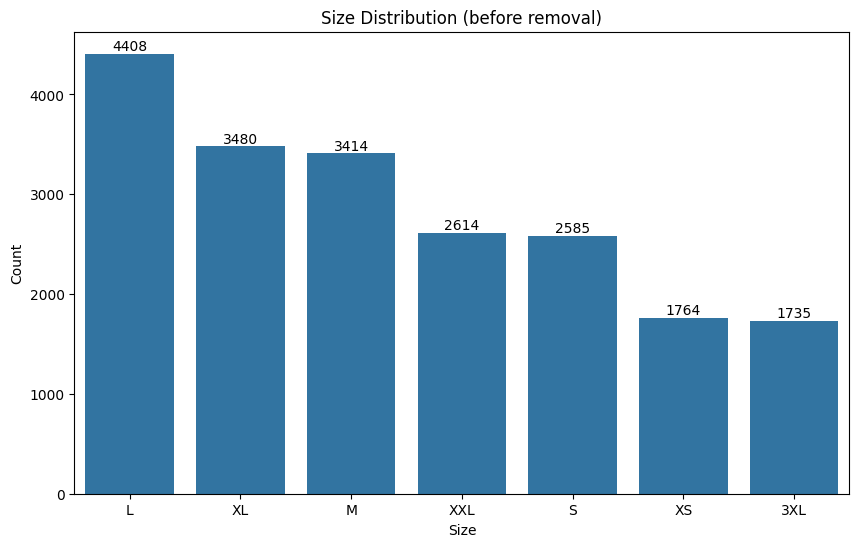

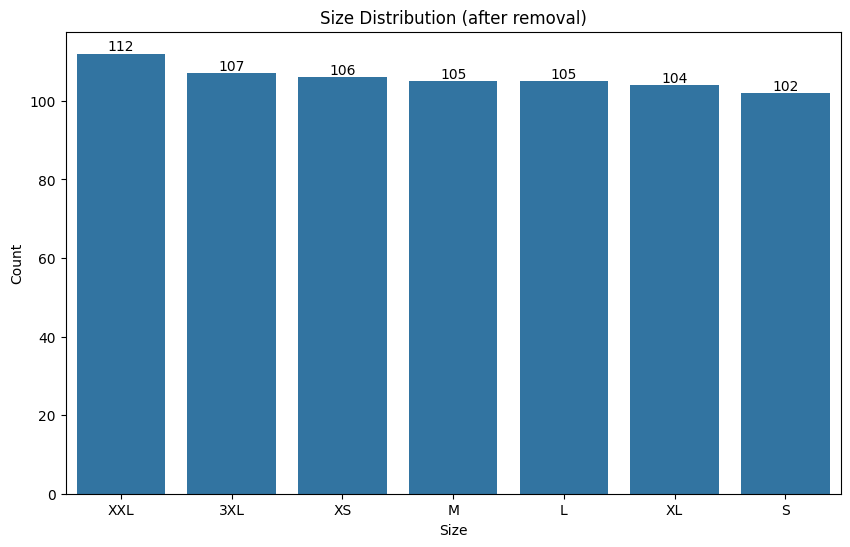


Material distributions:


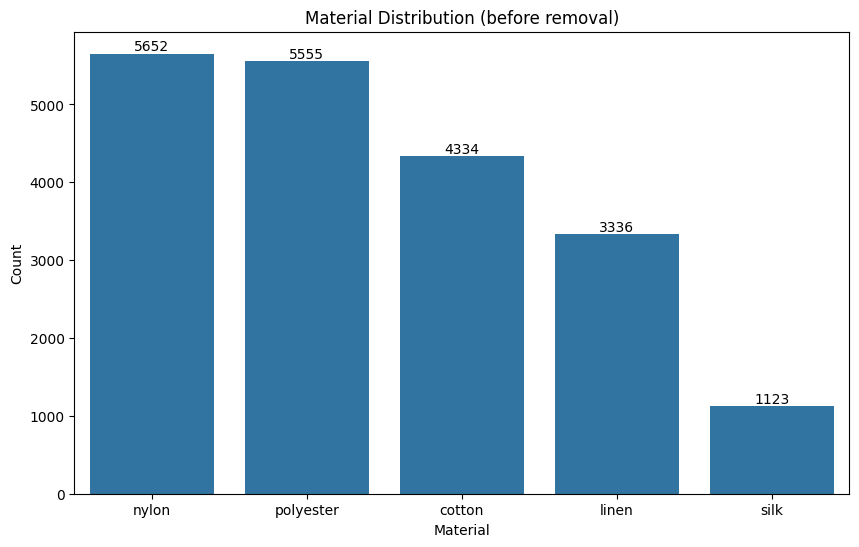

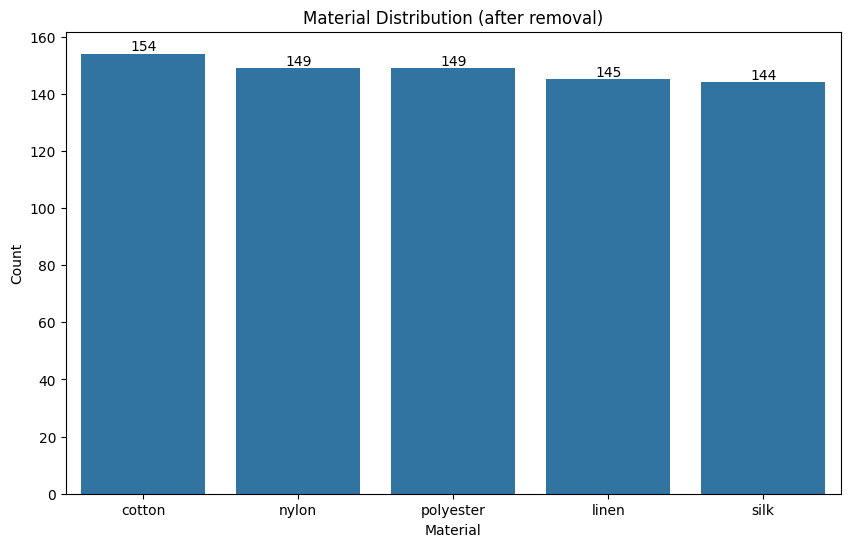


Color distributions:


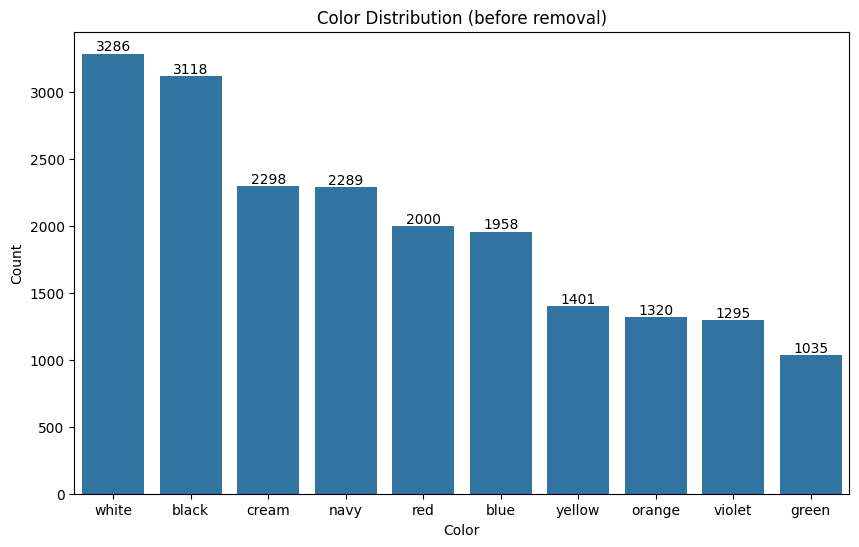

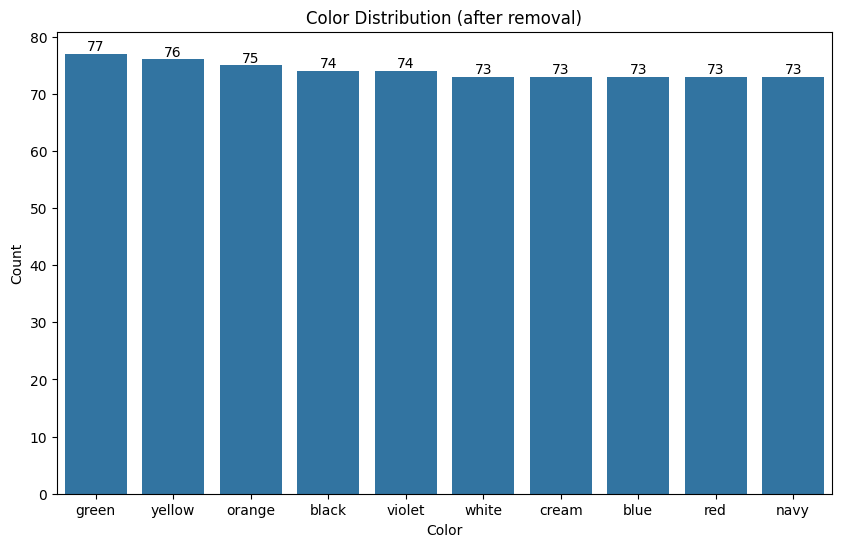


Sleeves distributions:


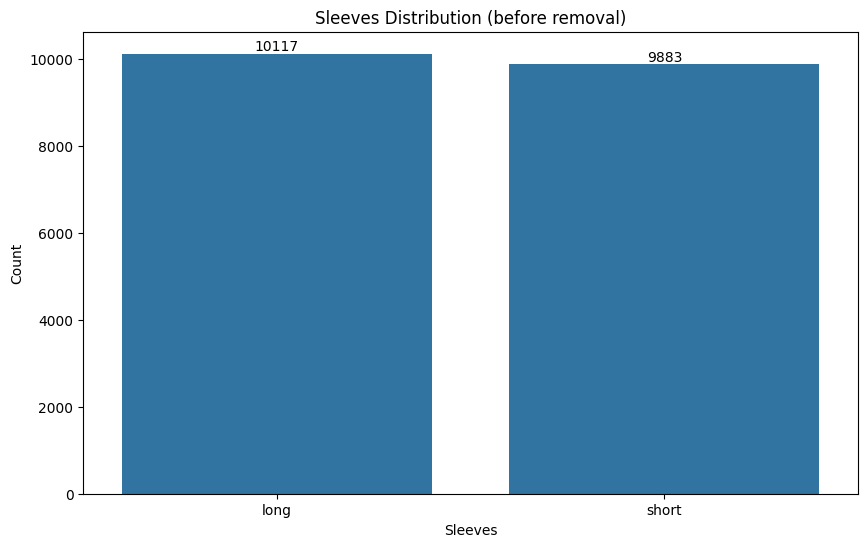

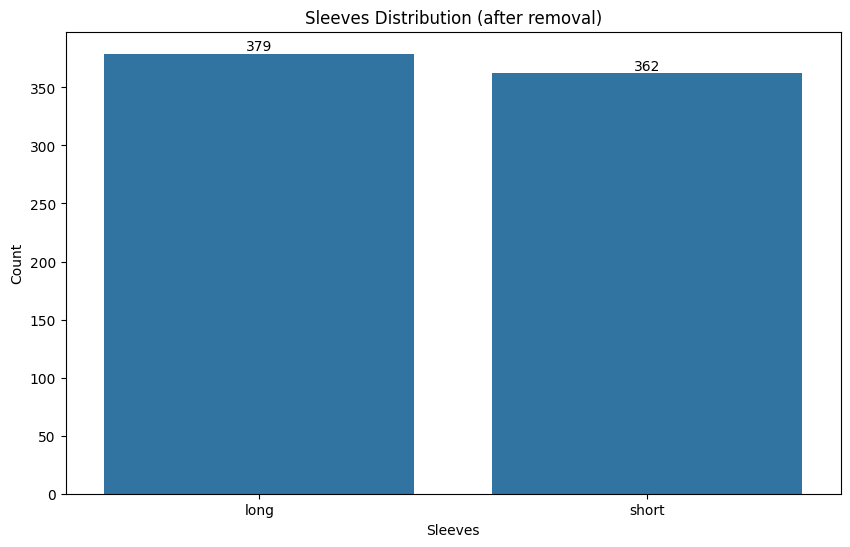


Demand distributions:


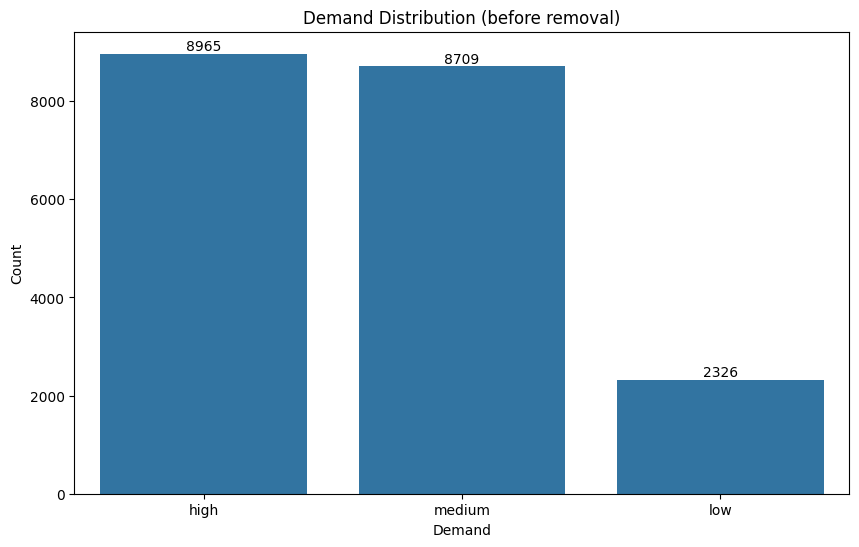

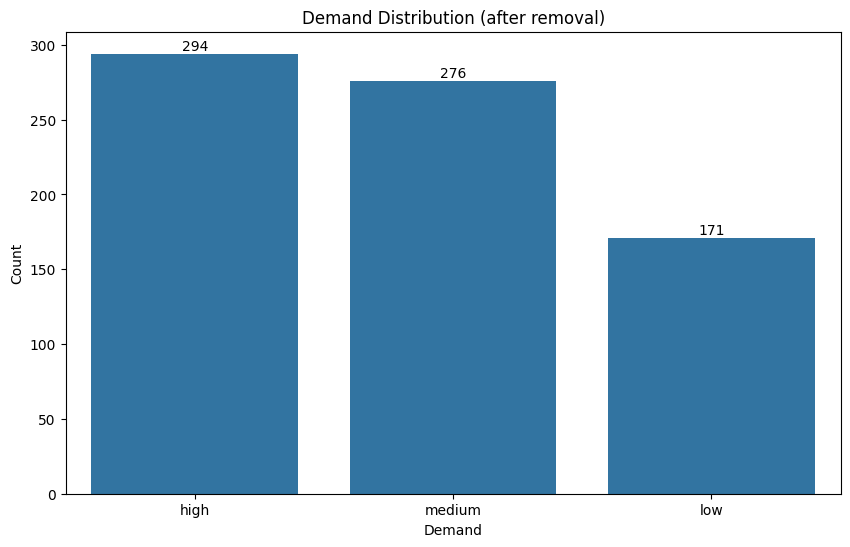


Conclusions: Apart from 'Sleeves distributions' all distributions are way more evenly spread. In more complex cases, order of items changed.


In [6]:
#Charts (presented in 'before and after' order)

printSpecial("Size distributions")

plt.figure(figsize=(10, 6))
sns.countplot(x='size', data=df, order=df['size'].value_counts().index)
plt.title('Size Distribution (before removal)')
plt.xlabel('Size')
plt.ylabel('Count')
ax = plt.gca()
bars = ax.containers[0]
ax.bar_label(bars)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='size', data=df_cleaned, order=df_cleaned['size'].value_counts().index)
plt.title('Size Distribution (after removal)')
plt.xlabel('Size')
plt.ylabel('Count')
ax = plt.gca()
bars = ax.containers[0]
ax.bar_label(bars)
plt.show()

printSpecial("Material distributions")

plt.figure(figsize=(10, 6))
sns.countplot(x='material', data=df, order=df['material'].value_counts().index)
plt.title('Material Distribution (before removal)')
plt.xlabel('Material')
plt.ylabel('Count')
ax = plt.gca()
bars = ax.containers[0]
ax.bar_label(bars)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='material', data=df_cleaned, order=df_cleaned['material'].value_counts().index)
plt.title('Material Distribution (after removal)')
plt.xlabel('Material')
plt.ylabel('Count')
ax = plt.gca()
bars = ax.containers[0]
ax.bar_label(bars)
plt.show()

printSpecial("Color distributions")

plt.figure(figsize=(10, 6))
sns.countplot(x='color', data=df, order=df['color'].value_counts().index)
plt.title('Color Distribution (before removal)')
plt.xlabel('Color')
plt.ylabel('Count')
ax = plt.gca()
bars = ax.containers[0]
ax.bar_label(bars)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='color', data=df_cleaned, order=df_cleaned['color'].value_counts().index)
plt.title('Color Distribution (after removal)')
plt.xlabel('Color')
plt.ylabel('Count')
ax = plt.gca()
bars = ax.containers[0]
ax.bar_label(bars)
plt.show()

printSpecial("Sleeves distributions")

plt.figure(figsize=(10, 6))
sns.countplot(x='sleeves', data=df, order=df['sleeves'].value_counts().index)
plt.title('Sleeves Distribution (before removal)')
plt.xlabel('Sleeves')
plt.ylabel('Count')
ax = plt.gca()
bars = ax.containers[0]
ax.bar_label(bars)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='sleeves', data=df_cleaned, order=df_cleaned['sleeves'].value_counts().index)
plt.title('Sleeves Distribution (after removal)')
plt.xlabel('Sleeves')
plt.ylabel('Count')
ax = plt.gca()
bars = ax.containers[0]
ax.bar_label(bars)
plt.show()

printSpecial("Demand distributions")

plt.figure(figsize=(10, 6))
sns.countplot(x='demand', data=df, order=df['demand'].value_counts().index)
plt.title('Demand Distribution (before removal)')
plt.xlabel('Demand')
plt.ylabel('Count')
ax = plt.gca()
bars = ax.containers[0]
ax.bar_label(bars)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='demand', data=df_cleaned, order=df_cleaned['demand'].value_counts().index)
plt.title('Demand Distribution (after removal)')
plt.xlabel('Demand')
plt.ylabel('Count')
ax = plt.gca()
bars = ax.containers[0]
ax.bar_label(bars)
plt.show()

printBold("Conclusions: Apart from 'Sleeves distributions' all distributions are way more evenly spread. In more complex cases, order of items changed.")

In [7]:
#Separating features from labels:
X = df_cleaned[['size', 'material', 'color', 'sleeves']].copy()
y = df_cleaned['demand']

#Converting text data to numeric data
label_encoders = {}
for column in ['size', 'material', 'color', 'sleeves']:
    label_encoders[column] = LabelEncoder()
    X.loc[:, column] = label_encoders[column].fit_transform(X[column])


<h1>Data preparation

<h3> KNN

In [8]:
#Division of data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=268555)

In [9]:
#Training the model on raw data
knn = KNeighborsClassifier(n_neighbors=10)  #Model initialization
knn.fit(X_train, y_train)                   #Model training
y_pred = knn.predict(X_val)                 #Predictions for validation data

#Calculating model evaluation metrics
#average='macro', because we want to calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
accuracy_raw = accuracy_score(y_val, y_pred)
precision_raw = precision_score(y_val, y_pred, average='macro', zero_division=0)
recall_raw = recall_score(y_val, y_pred, average='macro', zero_division=0)
f1_raw = f1_score(y_val, y_pred, average='macro', zero_division=0)

print(f'Accuracy: {accuracy_raw:.3f}')
print(f'Precision: {precision_raw:.3f}')
print(f'Recall: {recall_raw:.3f}')
print(f'F1-score: {f1_raw:.3f}')

Accuracy: 0.610
Precision: 0.621
Recall: 0.619
F1-score: 0.599


In [10]:
#Division of normalized, scaled (MinMaxScaler) data
scaler = MinMaxScaler()                         # Initialize the MinMaxScaler, which scales the data to the range [0, 1]
X_train_norm = scaler.fit_transform(X_train)    # Fit the scaler to the training data and transform the training data
X_val_norm = scaler.transform(X_val)            # Transform the validation data using the previously fitted scale

knn.fit(X_train_norm, y_train)                  #Train the model using the normalized training data
y_pred_norm = knn.predict(X_val_norm)           #Predict the labels for the normalized validation data

#Calculating model evaluation metrics
#average='macro', because we want to calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
accuracy_norm = accuracy_score(y_val, y_pred_norm)
precision_norm = precision_score(y_val, y_pred_norm, average='macro', zero_division=0)
recall_norm = recall_score(y_val, y_pred_norm, average='macro', zero_division=0)
f1_norm = f1_score(y_val, y_pred_norm, average='macro', zero_division=0)

print(f'Accuracy: {accuracy_norm:.3f}')
print(f'Precision: {precision_norm:.3f}')
print(f'Recall: {recall_norm:.3f}')
print(f'F1-score: {f1_norm:.3f}')

Accuracy: 0.673
Precision: 0.673
Recall: 0.679
F1-score: 0.673


In [11]:
#Division of normalized, scaled (MaxAbsScaler) data
scaler = MaxAbsScaler()
X_train_mas = scaler.fit_transform(X_train)
X_val_mas = scaler.transform(X_val)

knn.fit(X_train_norm, y_train)
y_pred_mas = knn.predict(X_val_mas)

#Calculating model evaluation metrics
#average='macro', because we want to calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
accuracy_norm = accuracy_score(y_val, y_pred_mas)
precision_norm = precision_score(y_val, y_pred_mas, average='macro', zero_division=0)
recall_norm = recall_score(y_val, y_pred_mas, average='macro', zero_division=0)
f1_norm = f1_score(y_val, y_pred_mas, average='macro', zero_division=0)

print(f'Accuracy: {accuracy_norm:.3f}')
print(f'Precision: {precision_norm:.3f}')
print(f'Recall: {recall_norm:.3f}')
print(f'F1-score: {f1_norm:.3f}')

Accuracy: 0.673
Precision: 0.673
Recall: 0.679
F1-score: 0.673


In [12]:
#Division of normalized, scaled (StandardScaler) data

scaler = StandardScaler()                   # Initialize the StandardScaler, which scales the data to have mean = 0 and standard deviation = 1
X_train_std = scaler.fit_transform(X_train) # Fit the scaler to the training data and transform the training data
X_val_std = scaler.transform(X_val)         # Transform the validation data using the previously fitted scaler

knn.fit(X_train_std, y_train)               #Train the model using the normalized training data
y_pred_std = knn.predict(X_val_std)         #Predict the labels for the normalized validation data

#Calculating model evaluation metrics
#average='macro', because we want to calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
accuracy_std = accuracy_score(y_val, y_pred_std)
precision_std = precision_score(y_val, y_pred_std, average='macro', zero_division=0)
recall_std = recall_score(y_val, y_pred_std, average='macro', zero_division=0)
f1_std = f1_score(y_val, y_pred_std, average='macro', zero_division=0)

print(f'Accuracy: {accuracy_std:.3f}')
print(f'Precision: {precision_std:.3f}')
print(f'Recall: {recall_std:.3f}')
print(f'F1-score: {f1_std:.3f}')

Accuracy: 0.664
Precision: 0.662
Recall: 0.668
F1-score: 0.662


In [13]:
scaler = RobustScaler()                     # Initialize the RobustScaler
X_train_rs = scaler.fit_transform(X_train)  # Fit the scaler to the training data and transform the training data
X_val_rs = scaler.transform(X_val)          # Transform the validation data using the previously fitted scaler

knn.fit(X_train_rs, y_train)                #Train the model using the normalized training data
y_pred_rs = knn.predict(X_val_rs)           #Predict the labels for the normalized validation data

#Calculating model evaluation metrics
#average='macro', because we want to calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
accuracy_norm = accuracy_score(y_val, y_pred_rs)
precision_norm = precision_score(y_val, y_pred_rs, average='macro', zero_division=0)
recall_norm = recall_score(y_val, y_pred_rs, average='macro', zero_division=0)
f1_norm = f1_score(y_val, y_pred_rs, average='macro', zero_division=0)

print(f'Accuracy: {accuracy_norm:.3f}')
print(f'Precision: {precision_norm:.3f}')
print(f'Recall: {recall_norm:.3f}')
print(f'F1-score: {f1_norm:.3f}')

Accuracy: 0.709
Precision: 0.719
Recall: 0.715
F1-score: 0.712


In [14]:
#Division of discretized (KBinsDiscretizer) data

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform') # Initialize the KBinsDiscretizer, which discretizes continuous features into k bins
X_train_disc = discretizer.fit_transform(X_train)                               # Fit the discretizer to the training data and transform the training data
X_val_disc = discretizer.transform(X_val)                                       # Transform the validation data using the previously fitted discretizer

knn.fit(X_train_disc, y_train)                                                  # Train the KNN model using the discretized training data
y_pred_disc = knn.predict(X_val_disc)                                           # Predict the labels for the discretized validation data

#Calculating model evaluation metrics
#average='macro', because we want to calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
accuracy_disc = accuracy_score(y_val, y_pred_disc)
precision_disc = precision_score(y_val, y_pred_disc, average='macro', zero_division=0)
recall_disc = recall_score(y_val, y_pred_disc, average='macro', zero_division=0)
f1_disc = f1_score(y_val, y_pred_disc, average='macro', zero_division=0)

print(f'Accuracy: {accuracy_disc:.3f}')
print(f'Precision: {precision_disc:.3f}')
print(f'Recall: {recall_disc:.3f}')
print(f'F1-score: {f1_disc:.3f}')

Accuracy: 0.682
Precision: 0.693
Recall: 0.678
F1-score: 0.680


In [15]:
#Division of discretized (QuantileTransformer) data
discretizer = QuantileTransformer(n_quantiles=10, output_distribution='uniform')    # Initialize the QuantileTransformer with a specified number of quantiles
X_train_disc = discretizer.fit_transform(X_train)                                   # Fit the transformer to the training data and transform the training data
X_val_disc = discretizer.transform(X_val)                                           # Transform the validation data using the previously fitted transformer

knn.fit(X_train_disc, y_train)                                                      # Train the KNN model using the discretized training data
y_pred_qt = knn.predict(X_val_disc)                                                 # Predict the labels for the discretized validation data

#Calculating model evaluation metrics
#average='macro', because we want to calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
accuracy_disc = accuracy_score(y_val, y_pred_qt)
precision_disc = precision_score(y_val, y_pred_qt, average='macro', zero_division=0)
recall_disc = recall_score(y_val, y_pred_qt, average='macro', zero_division=0)
f1_disc = f1_score(y_val, y_pred_qt, average='macro', zero_division=0)

print(f'Accuracy: {accuracy_disc:.3f}')
print(f'Precision: {precision_disc:.3f}')
print(f'Recall: {recall_disc:.3f}')
print(f'F1-score: {f1_disc:.3f}')

Accuracy: 0.695
Precision: 0.698
Recall: 0.695
F1-score: 0.694


In [16]:
#Division of reduced dimensionally (PCA) data

pca = PCA(n_components=3) #(1-4)            # Apply Principal Component Analysis (PCA) to reduce the dimensionality of the data to 3 components
X_train_pca = pca.fit_transform(X_train)    # Fit the PCA on the training data and transform the training data
X_val_pca = pca.transform(X_val)            # Transform the validation data using the previously fitted PCA model

knn.fit(X_train_pca, y_train)               # Train the KNN model using the PCA-transformed training data
y_pred_pca = knn.predict(X_val_pca)         # Predict the labels for the PCA-transformed validation data

#Calculating model evaluation metrics
#average='macro', because we want to calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
accuracy_pca = accuracy_score(y_val, y_pred_pca)
precision_pca = precision_score(y_val, y_pred_pca, average='macro', zero_division=0)
recall_pca = recall_score(y_val, y_pred_pca, average='macro', zero_division=0)
f1_pca = f1_score(y_val, y_pred_pca, average='macro', zero_division=0)

print(f'Accuracy: {accuracy_pca:.3f}')
print(f'Precision: {precision_pca:.3f}')
print(f'Recall: {recall_pca:.3f}')
print(f'F1-score: {f1_pca:.3f}')

Accuracy: 0.534
Precision: 0.532
Recall: 0.548
F1-score: 0.530


In [17]:
#Division of reduced dimensionally (Kernel PCA) data

kpca = KernelPCA(n_components=3, kernel='rbf') #(1-4)   # Initialize KernelPCA with the RBF kernel
X_train_kpca = kpca.fit_transform(X_train)              # Fit the model to the training data and transform it
X_val_kpca = kpca.transform(X_val)                      # Transform the validation data

knn.fit(X_train_kpca, y_train)               # Train the KNN model using the PCA-transformed training data
y_pred_kpca = knn.predict(X_val_kpca)         # Predict the labels for the PCA-transformed validation data

#Calculating model evaluation metrics
#average='macro', because we want to calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
accuracy_pca = accuracy_score(y_val, y_pred_kpca)
precision_pca = precision_score(y_val, y_pred_kpca, average='macro', zero_division=0)
recall_pca = recall_score(y_val, y_pred_kpca, average='macro', zero_division=0)
f1_pca = f1_score(y_val, y_pred_kpca, average='macro', zero_division=0)

print(f'Accuracy: {accuracy_pca:.3f}')
print(f'Precision: {precision_pca:.3f}')
print(f'Recall: {recall_pca:.3f}')
print(f'F1-score: {f1_pca:.3f}')

Accuracy: 0.462
Precision: 0.450
Recall: 0.472
F1-score: 0.455


<h1> Classification

Naive Bayes Params: {'var_smoothing': 0.1}
Accuracy: 0.700
Precision: 0.723
Recall: 0.688
F1-score: 0.701
Naive Bayes Params: {'var_smoothing': 0.001}
Accuracy: 0.695
Precision: 0.708
Recall: 0.684
F1-score: 0.693
Naive Bayes Params: {'var_smoothing': 1e-05}
Accuracy: 0.695
Precision: 0.708
Recall: 0.684
F1-score: 0.693
Decision Tree Params: {'criterion': 'gini', 'max_depth': 3}
Accuracy: 0.771
Precision: 0.780
Recall: 0.775
F1-score: 0.777

Decision Tree Params: {'criterion': 'gini', 'max_depth': None}
Accuracy: 0.713
Precision: 0.698
Recall: 0.716
F1-score: 0.702

Decision Tree Params: {'criterion': 'entropy', 'max_depth': 5}
Accuracy: 0.695
Precision: 0.693
Recall: 0.715
F1-score: 0.690



TypeError: can only concatenate list (not "float") to list

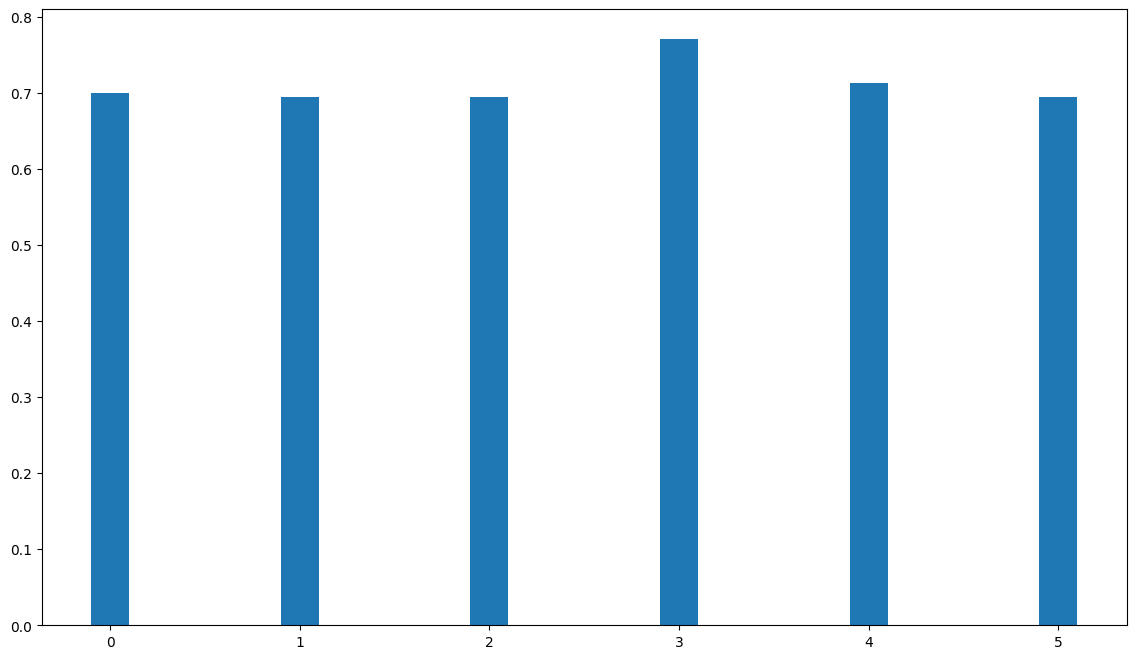

In [19]:
nb_params = [
    {'var_smoothing': 1e-1},
    {'var_smoothing': 1e-3},
    {'var_smoothing': 1e-5}
]

dt_params = [
    {'criterion': 'gini', 'max_depth': 3},
        {'criterion': 'gini', 'max_depth': None},
    {'criterion': 'entropy', 'max_depth': 5}
]


results = []

for params in nb_params:
    nb_classifier = GaussianNB(**params)
    nb_classifier.fit(X_train_norm, y_train)
    y_pred_nb = nb_classifier.predict(X_val_norm)

    accuracy_nb = accuracy_score(y_val, y_pred_nb)
    precision_nb = precision_score(y_val, y_pred_nb, average='macro', zero_division=0)
    recall_nb = recall_score(y_val, y_pred_nb, average='macro', zero_division=0)
    f1_nb = f1_score(y_val, y_pred_nb, average='macro', zero_division=0)

    print(f'Naive Bayes Params: {params}')
    print(f'Accuracy: {accuracy_nb:.3f}')
    print(f'Precision: {precision_nb:.3f}')
    print(f'Recall: {recall_nb:.3f}')
    print(f'F1-score: {f1_nb:.3f}')
    results.append(('Naive Bayes', str(params), accuracy_nb, precision_nb, recall_nb, f1_nb))

for params in dt_params:
    dt_classifier = DecisionTreeClassifier(**params, random_state=266577)   # Initialize the Decision Tree classifier with the current parameters
    dt_classifier.fit(X_train_norm, y_train)                                # Train the model on the training data
    y_pred_dt = dt_classifier.predict(X_val_norm)                           # Predict the labels for the validation data

    # Calculate the evaluation metrics for the model
    accuracy_dt = accuracy_score(y_val, y_pred_dt)
    precision_dt = precision_score(y_val, y_pred_dt, average='macro', zero_division=0)
    recall_dt = recall_score(y_val, y_pred_dt, average='macro', zero_division=0)
    f1_dt = f1_score(y_val, y_pred_dt, average='macro', zero_division=0)

    # Print the results
    print(f'Decision Tree Params: {params}')
    print(f'Accuracy: {accuracy_dt:.3f}')
    print(f'Precision: {precision_dt:.3f}')
    print(f'Recall: {recall_dt:.3f}')
    print(f'F1-score: {f1_dt:.3f}')
    print('')

    # Append the results to the list
    results.append(('Decision Tree', str(params), accuracy_dt, precision_dt, recall_dt, f1_dt))

# Create a DataFrame with the results
results_df = pd.DataFrame(results, columns=['Model', 'Parameters', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Plot settings
bar_width = 0.2  # Width of the bars
index = np.arange(len(results_df))  # Indices for the bars

plt.figure(figsize=(14, 8))  # Set the size of the plot

# Create bars for the different metrics
plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy')
plt.bar(index + bar_width, results_df['Precision'], bar_width, label='Precision')
plt.bar(index + 2 * bar_width, results_df['Recall'], bar_width, label='Recall')
plt.bar(index + 3 * bar_width, results_df['F1-score'], bar_width, label='F1-score')

# Add labels and title
plt.xlabel('Model and Parameters')
plt.ylabel('Score')
plt.title('Comparison of Naive Bayes and Decision Tree Classifiers with Different Hyperparameters')
plt.xticks(index + bar_width, results_df['Model'] + '\n' + results_df['Parameters'], rotation=30, ha='right')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Second Visualization: Line Plot for each Metric
plt.figure(figsize=(14, 8))  # Set the size of the plot

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']:
    plt.plot(results_df.index, results_df[metric], marker='o', label=metric)

# Add labels and title
plt.xlabel('Model and Parameters')
plt.ylabel('Score')
plt.title('Comparison of Naive Bayes and Decision Tree Classifiers with Different Hyperparameters')
plt.xticks(results_df.index, results_df['Model'] + '\n' + results_df['Parameters'], rotation=30, ha='right')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
